For this chapter we'll be using the CIFAR dataset from tensorflow.

This dataset contains $60000$ $32*32$ color images, evenly distributed into ten classes, with each class representing a specific object category. The ten classes are: `airplane, automobile, bird, cat, deer, dog, frog, horse, ship`, and `truck`. The dataset is divided into 50,000 training images and 10,000 testing images.

- Importing required dependencies:

In [8]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Flatten, 
                                     Dense, 
                                     Dropout, 
                                     GlobalAveragePooling2D)
from tensorflow.keras.callbacks import ModelCheckpoint

ImportError: cannot import name 'np_utils' from 'keras.utils' (c:\Users\KUSHAL\anaconda3\envs\DL\Lib\site-packages\keras\utils\__init__.py)

### Loading dataset:

In [5]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
x_train.shape

(50000, 32, 32, 3)

- Visualizing some images:

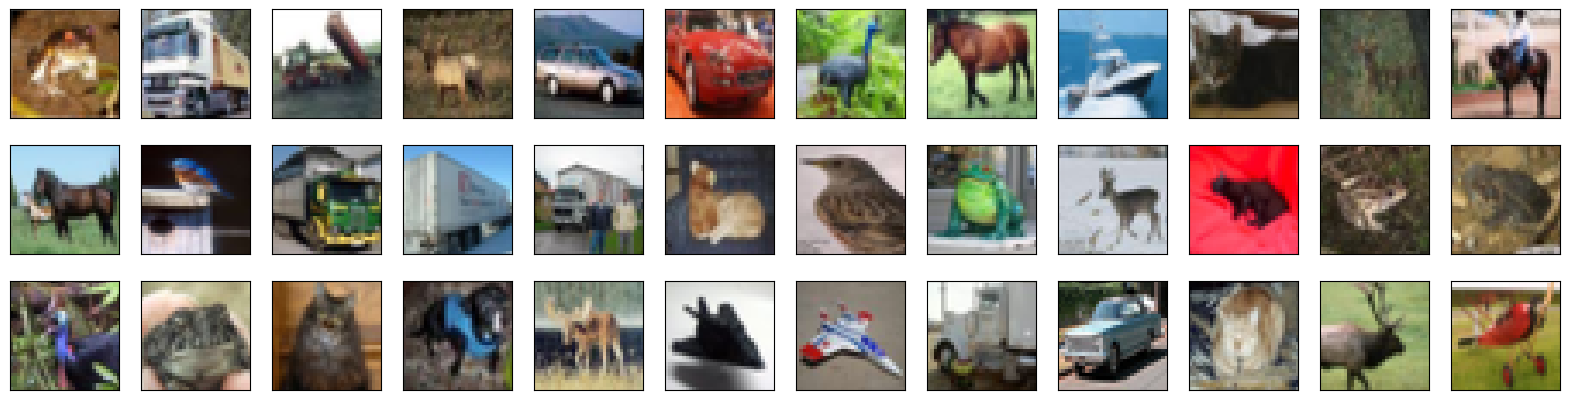

In [6]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

- Scaling the pixel value of the images before processing:

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

- Preparing target dataset and segregating x_train into training and validation datasets:

In [11]:
# one-hot encoding the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### Creating the CNN model:

In [18]:
model = Sequential()

# First convultional layer:
model.add(Conv2D(filters=16, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

# Second convolutional layer:
model.add(Conv2D(filters=32, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Third convolutional layer:
model.add(Conv2D(filters=64, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Adding a dropout layer to the model with a dropout rate of 0.3. 
# The dropout rate is the percentage of neurons that will be dropped out during training. 
# In this case, 30% of the neurons will be dropped out.
#model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 64)         

- Compiling the created CNN

In [19]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

- Training the CNN:

In [20]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='Chapter7.model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

hist = model.fit(x_train, y_train, 
                 batch_size=64, epochs=5,
                 validation_data=(x_valid, y_valid), 
                 callbacks=[checkpointer],
                 verbose=2, shuffle=True)

Epoch 1/5

Epoch 1: val_loss improved from inf to 1.62110, saving model to Chapter7.model.weights.best.hdf5
704/704 - 24s - loss: 1.5639 - accuracy: 0.4312 - val_loss: 1.6211 - val_accuracy: 0.4226 - 24s/epoch - 33ms/step
Epoch 2/5

Epoch 2: val_loss improved from 1.62110 to 1.35004, saving model to Chapter7.model.weights.best.hdf5
704/704 - 26s - loss: 1.1267 - accuracy: 0.5981 - val_loss: 1.3500 - val_accuracy: 0.5440 - 26s/epoch - 37ms/step
Epoch 3/5

Epoch 3: val_loss improved from 1.35004 to 0.94345, saving model to Chapter7.model.weights.best.hdf5
704/704 - 27s - loss: 0.9115 - accuracy: 0.6797 - val_loss: 0.9435 - val_accuracy: 0.6702 - 27s/epoch - 39ms/step
Epoch 4/5

Epoch 4: val_loss did not improve from 0.94345
704/704 - 24s - loss: 0.7595 - accuracy: 0.7330 - val_loss: 1.0186 - val_accuracy: 0.6644 - 24s/epoch - 34ms/step
Epoch 5/5

Epoch 5: val_loss improved from 0.94345 to 0.93527, saving model to Chapter7.model.weights.best.hdf5
704/704 - 24s - loss: 0.6286 - accuracy: 0

- Visualizing Some Predictions

In [21]:
# get predictions on the test set
y_hat = model.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 2s 5ms/step


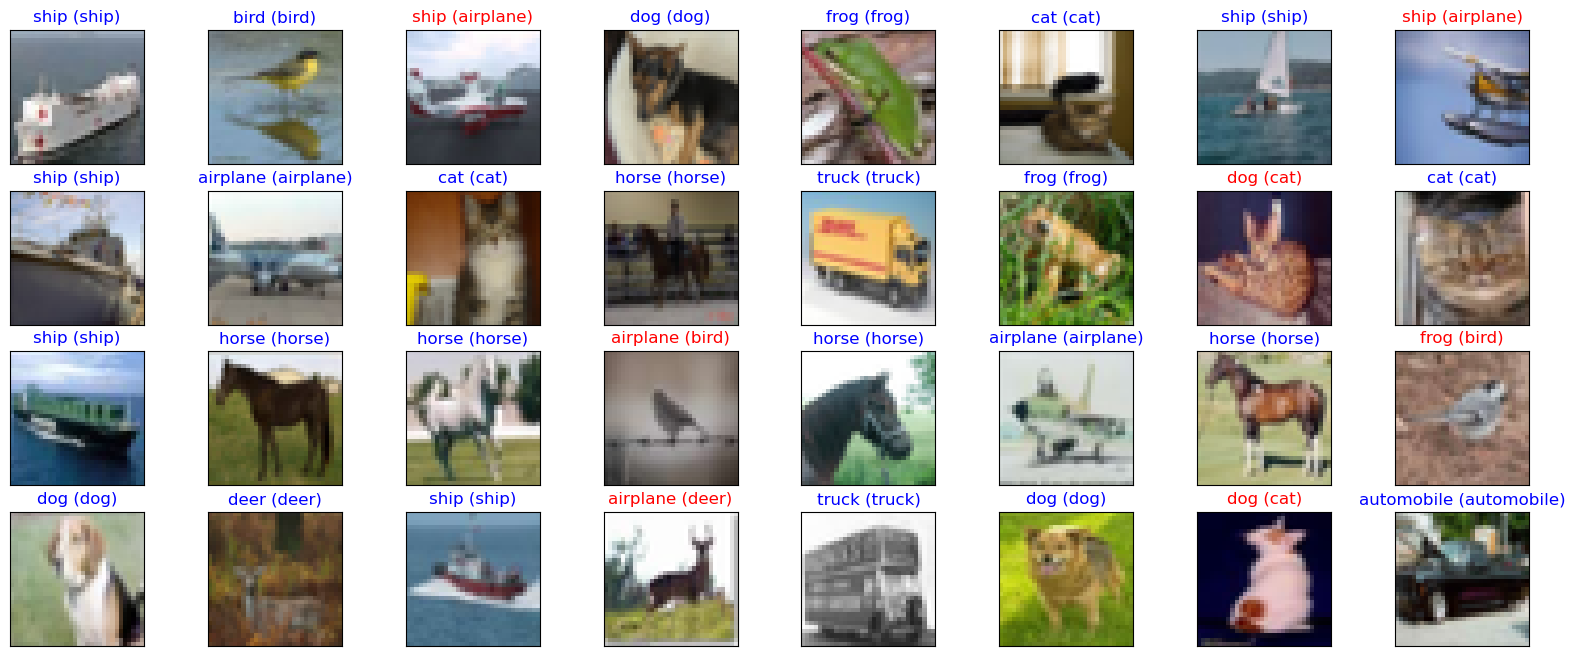

In [22]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))